In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("codenamekimani/fruits-and-vegetables")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fruits-and-vegetables' dataset.
Path to dataset files: /kaggle/input/fruits-and-vegetables


In [3]:
import os
data_path = os.path.join(path, 'Fruits_Vegetables')
data_path

'/kaggle/input/fruits-and-vegetables/Fruits_Vegetables'

In [4]:
data_train_path = "/content/Fruits_Vegetables/train"
data_test_path = "/content/Fruits_Vegetables/test"
data_val_path = "/content/Fruits_Vegetables/validation"

In [5]:
img_weight = 180
img_height = 180

In [8]:
import shutil

src = data_path # Use the correctly defined data_path
dst = "/content/Fruits_Vegetables"

# Remove the destination directory if it already exists
if os.path.exists(dst):
    shutil.rmtree(dst)
    print(f"Removed existing directory: {dst}")

shutil.copytree(src, dst)
print("Copied to:", dst)

Removed existing directory: /content/Fruits_Vegetables
Copied to: /content/Fruits_Vegetables


In [9]:
import os

data_path = "/content/Fruits_Vegetables"
print(os.listdir(data_path))


['test', 'validation', 'train']


In [19]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_weight),
    batch_size=32,
    validation_split=False
).apply(tf.data.experimental.ignore_errors())

Found 119703 files belonging to 59 classes.


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [21]:
import os
data_cat = sorted(os.listdir(data_train_path))

In [22]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_height, img_weight),
    batch_size=32,
    validation_split=False
).apply(tf.data.experimental.ignore_errors())

Found 351 files belonging to 36 classes.


In [23]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_height, img_weight),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


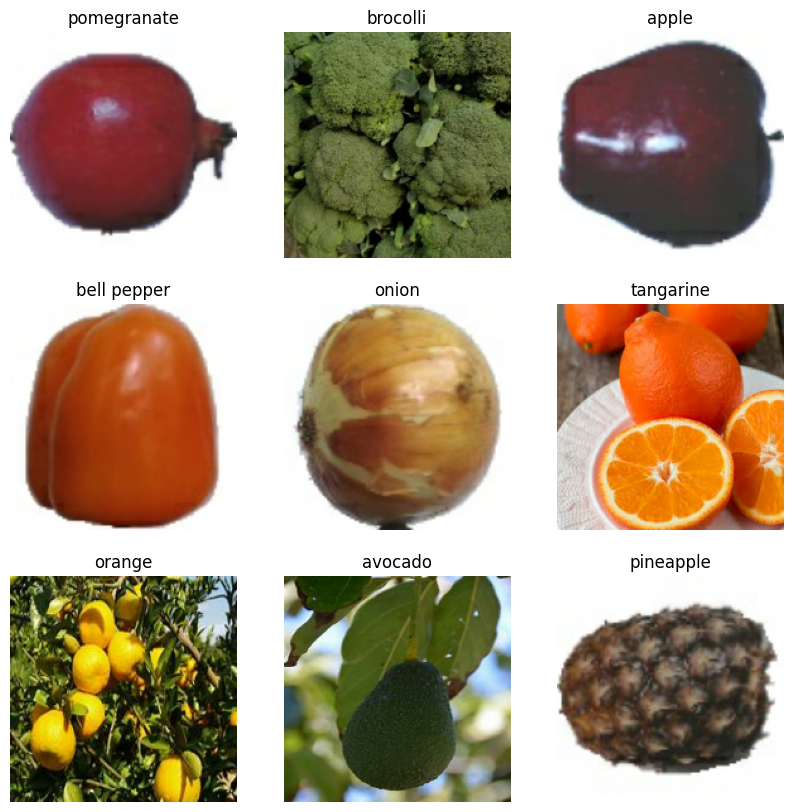

In [24]:
plt.figure(figsize=(10, 10))

for images , label in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data_cat[label[i]])
    plt.axis("off")

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))

])

In [27]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [28]:
history = model.fit(data_train, validation_data=data_val, epochs=25)

Epoch 1/25
   3729/Unknown 172s 45ms/step - accuracy: 0.5774 - loss: 1.6300

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3729/3729 ━━━━━━━━━━━━━━━━━━━━ 182s 48ms/step - accuracy: 0.5775 - loss: 1.6298 - val_accuracy: 0.0285 - val_loss: 9.1217
Epoch 2/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 149s 40ms/step - accuracy: 0.8112 - loss: 0.6975 - val_accuracy: 0.0342 - val_loss: 11.7821
Epoch 3/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 139s 37ms/step - accuracy: 0.8689 - loss: 0.4696 - val_accuracy: 0.0228 - val_loss: 13.9881
Epoch 4/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 137s 37ms/step - accuracy: 0.9073 - loss: 0.3155 - val_accuracy: 0.0285 - val_loss: 18.8363
Epoch 5/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 137s 37ms/step - accuracy: 0.9284 - loss: 0.2335 - val_accuracy: 0.0199 - val_loss: 22.6477
Epoch 6/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 137s 37ms/step - accuracy: 0.9474 - loss: 0.1694 - val_accuracy: 0.0228 - val_loss: 26.0891
Epoch 7/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 147s 39ms/step - accuracy: 0.9551 - loss: 0.1446 - val_accuracy: 0.0256 - val_loss: 28.6616
Epoch 8/25
3729/3729 ━━━━━━━━━━━━━━━━━━━━ 137s 37ms/step - accuracy: 0.960